In [1]:
# test the fitting: Deviance

In [2]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary

In [3]:
file_list = glob.glob('0822_Deviance_40_20/outfiles/*data*.pkl')
file_list = [i.replace("0822_Deviance_40_20/outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [4]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = "0822_Deviance_40_20/outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    err = data['err']
    params = data['params']
    row_dict = {"iter":iter,"particle":p,"err":err}
    row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
    pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,0.532876,0.898582,0.207406,0.143435,0.209756,0.466523,0.485108
1,1.0,1.0,0.465615,0.221871,0.634649,0.988594,0.972602,0.851055,0.941043
2,1.0,2.0,0.465615,0.160297,0.382033,0.857019,0.564518,0.527673,2.607965
3,1.0,3.0,0.532876,0.172608,0.895761,0.373341,0.128581,0.431230,1.444020
4,1.0,4.0,0.531457,0.789540,0.224306,0.897950,0.832221,0.563908,2.917096
...,...,...,...,...,...,...,...,...,...
795,40.0,15.0,0.292530,0.100000,0.407140,0.010000,0.070126,0.232482,0.000000
796,40.0,16.0,0.292510,0.124414,0.352186,0.010000,0.101147,0.511771,0.000000
797,40.0,17.0,0.314802,0.115025,0.442544,0.010000,0.110268,0.093268,0.000000
798,40.0,18.0,0.292510,0.114179,0.261864,0.010000,0.097925,0.530033,0.000000


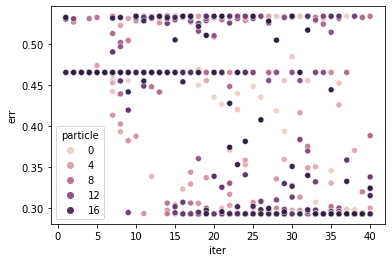

In [5]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

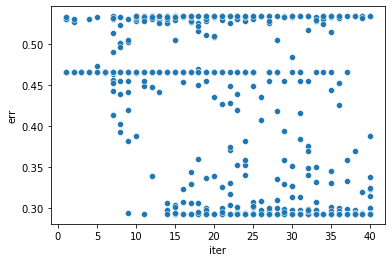

In [6]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

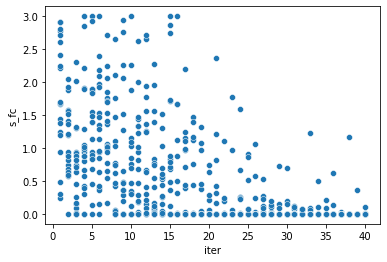

In [9]:
sns.scatterplot(data=pso_df, x="iter", y="s_fc")
plt.show()

In [8]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.119618,
 'beta_rec': 0.448703,
 'beta_rec_post': 0.01,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.0,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.095165,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'gamma_fc': 0.301229,
 'gamma_cf': 0.5}

In [ ]:
# plot the behavioral simulation result, maybe use functions

In [9]:
path = "0821_Logit_40_20/outfiles/" + str(1) + "data" + str(1) + ".pkl" 
with open(path, 'rb') as inp:
    data = pickle.load(inp)
data

{'err': 203013.28044919256,
 'params': array([0.14006916, 0.10804393, 0.77538879, 0.69232567, 0.81634205,
        0.13677998])}